# Euler's Method

#### Charlie Bailey (peba2926)

## SIRPLOT

In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt

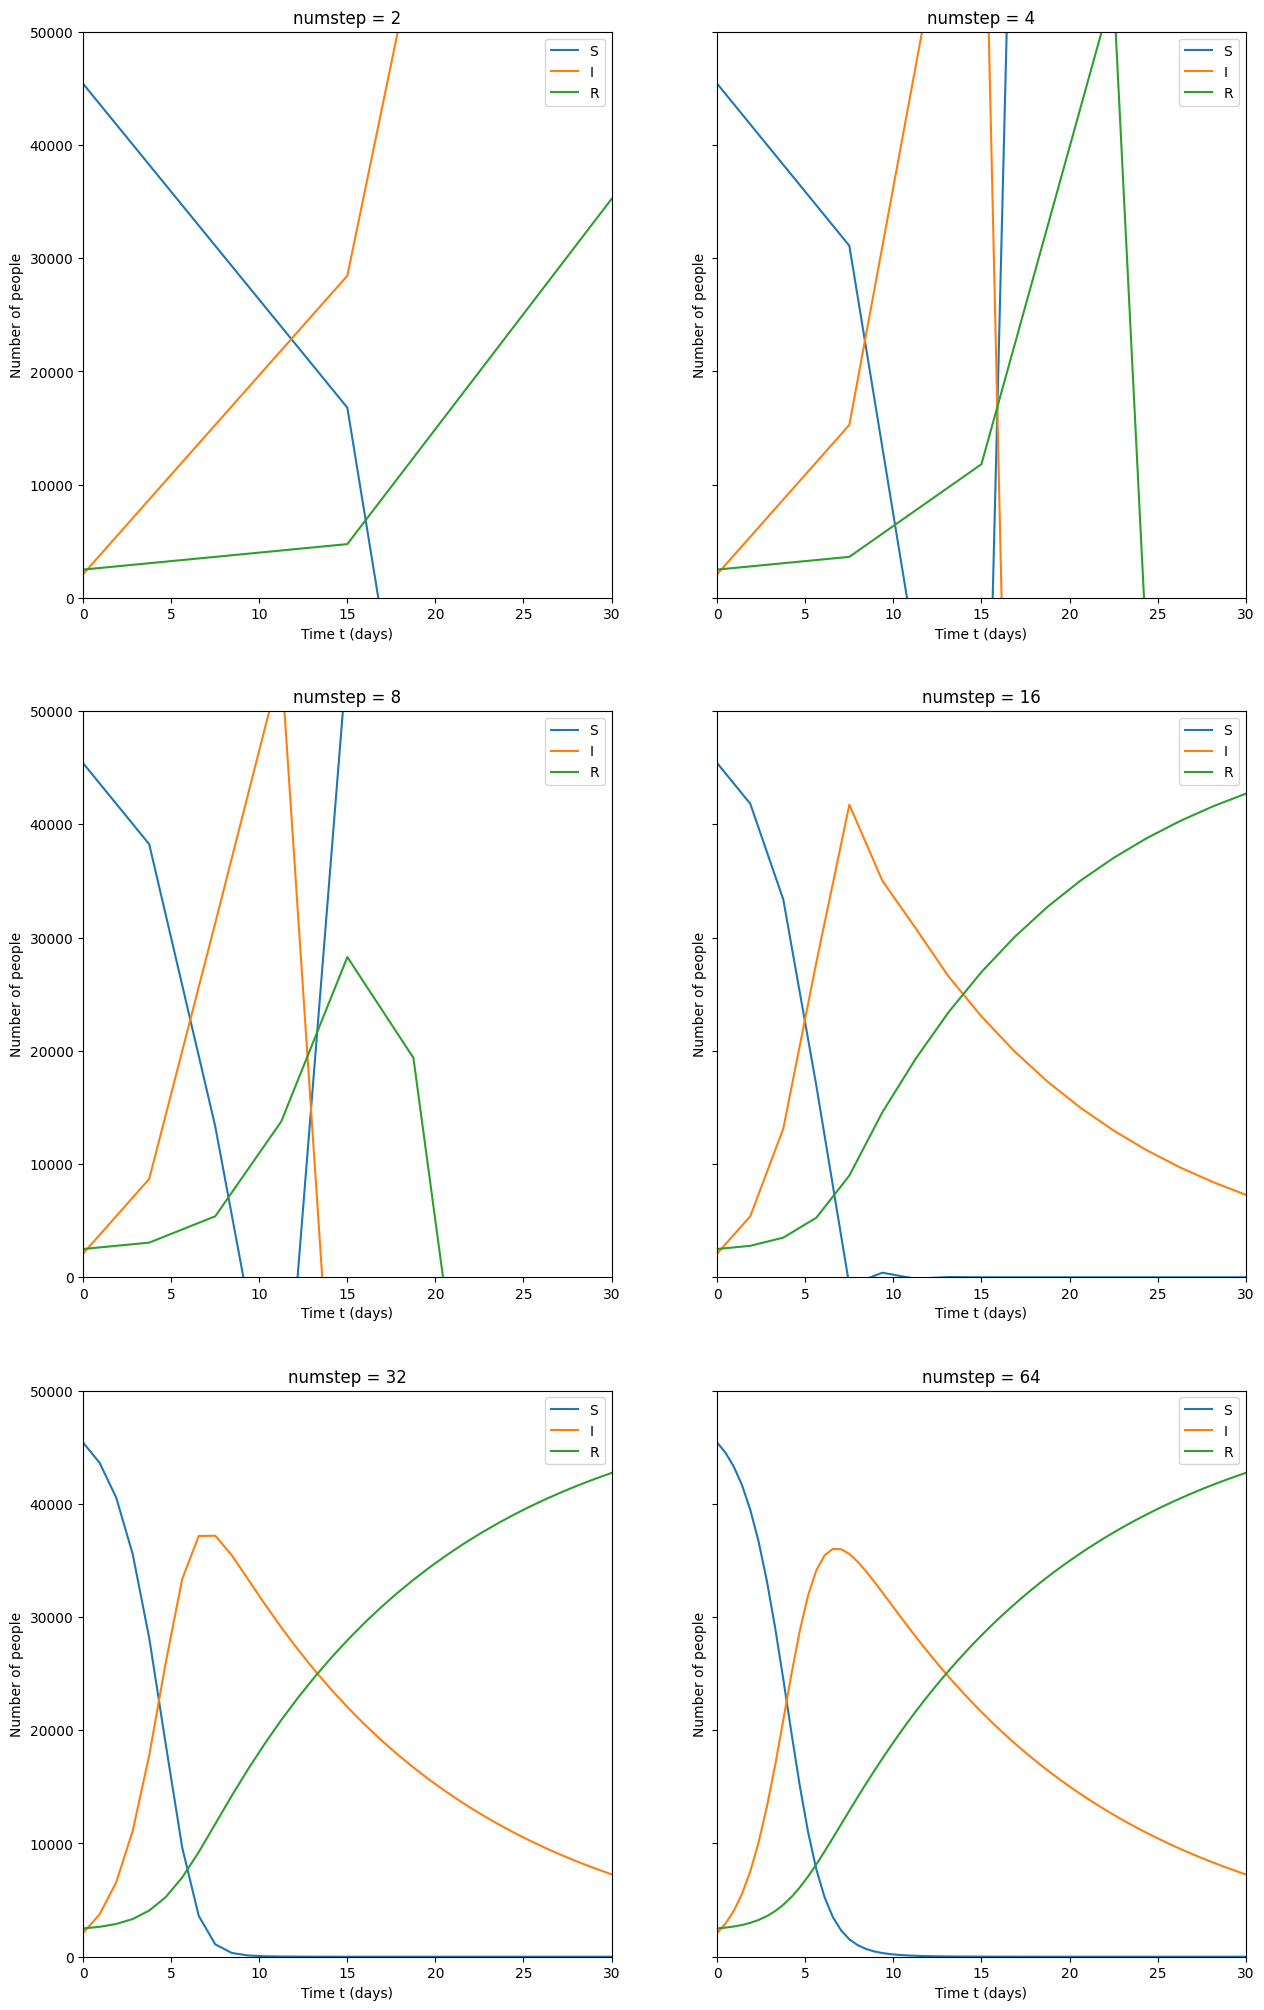

In [6]:
# Need to fix plotting to be more visually appealing
def SIRPLOT(iter, ax):

    t_data = list()
    S_data = list()
    I_data = list()
    R_data = list()

    tinitial = 0
    tfinal = 30

    t = tinitial
    S = 45400
    I = 2100
    R = 2500

    a = 0.00002
    b = (1/14)

    numsteps = 2**iter

    deltat = (tfinal - tinitial)/numsteps

    for _ in range(0, numsteps+1):
        Sprime = -a * S * I
        Iprime = (a * S * I) - (I/14)
        Rprime = I * b

        deltaS = Sprime * deltat
        deltaI = Iprime * deltat
        deltaR = Rprime * deltat

        t_data.append(t)
        S_data.append(S)
        I_data.append(I)
        R_data.append(R)

        t = t + deltat
        S = S + deltaS
        I = I + deltaI
        R = R + deltaR

    ax.plot(t_data, S_data, label='S');
    ax.plot(t_data, I_data, label='I');
    ax.plot(t_data, R_data, label='R');
    ax.legend();
    ax.set_title(f"numstep = {numsteps}");
    ax.set_ylim(0, 50000);
    ax.set_xlim(0, tfinal);
    ax.set_xlabel('Time t (days)');
    ax.set_ylabel('Number of people');


# show how the granularity model changes with 
# exponentially increasing time steps
fig, axes = plt.subplots(3, 2, figsize=(15, 25), sharey=True)
axes = axes.flatten()

for i, ax in enumerate(axes):

    SIRPLOT(iter=i+1, ax=ax)

### Timesteps

1. How small do the timesteps need to be to make the functions S, I, and R smooth?

* The curves begin to smooth out around ~75 steps

2. How does this relate to the length of time we want to look at? 

* if we are looking at a greater length of time for the illness, we need to use a larger number of timesteps to "smooth" the curves.

3. Will the graphs we create for the following questions be identical if we use different timesteps?

* No, as we can see in the graphs of various timesteps on the same model, the graphs will look very different (up to a point) if we use different timesteps.



## Case Study: Measles Epidemic

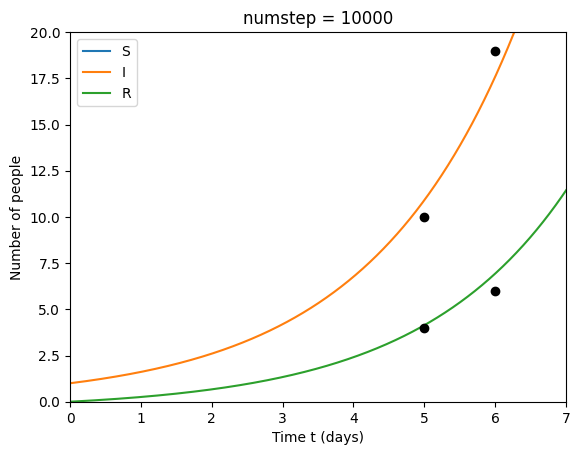

In [7]:
# Measles Panic 1
t_data = list()
S_data = list()
I_data = list()
R_data = list()

tinitial = 0
tfinal = 60

t = tinitial
S = 100000
I = 1
R = 0

a = 0.0000055
b = (1/5)

numsteps = 10000

deltat = (tfinal - tinitial)/numsteps

for i in range(0, numsteps+1):
    Sprime = -a * S * I
    Iprime = (a * S * I) - (I/14)
    Rprime = I * b

    deltaS = Sprime * deltat
    deltaI = Iprime * deltat
    deltaR = Rprime * deltat

    t_data.append(t)
    S_data.append(S)
    I_data.append(I)
    R_data.append(R)

    t = t + deltat
    S = S + deltaS
    I = I + deltaI
    R = R + deltaR


fig = plt.figure();
ax = fig.add_subplot(111, axisbelow=True);
ax.plot(t_data, S_data, label='S');
ax.plot(t_data, I_data, label='I');
ax.plot(t_data, R_data, label='R');

# plot known points for the epidemic
ax.plot(5, 10, 'ko');
ax.plot(5, 4, 'ko');
ax.plot(6, 19, 'ko');
ax.plot(6, 6, 'ko');

ax.legend();
ax.set_title(f"numstep = {numsteps}");
ax.set_ylim(0, 20);
ax.set_xlim(0, 7);
ax.set_xlabel('Time t (days)');
ax.set_ylabel('Number of people');
plt.show()

In the code above we can use the known information in the problem to model the illness using a rudimentary guess and check method. We know the following:

$S = 100,000$

$I = 1$

$R = 0$

$b = (1/5)$


However, we don't have a good method for determining $a$. To solve this, we plot the points that we do know onto the graph, and then zoom our time horizon in to look at the first few days of the illness. From here we can adjust the values of $a$ (I used a manual form of binary search) until we find a value for $a$ the best matches the data we have. Using this process I found an $a$ value of:

$a = 0.0000055$ 

best approximated the given points with a high number of time slices.

Now we have all the information needed to model our illness so we can zoom back out and see how it will play out over the coming days.

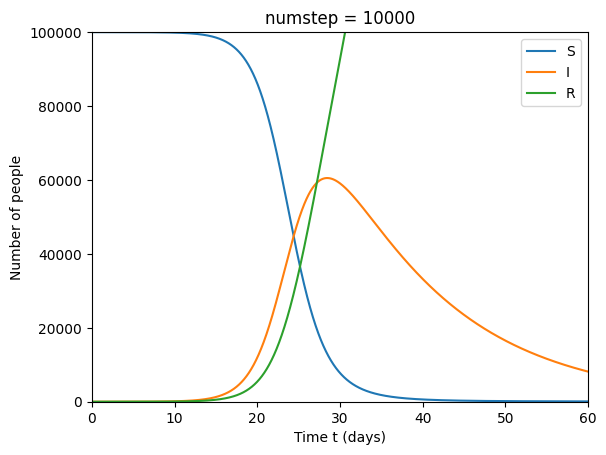

In [8]:
# Measles Panic 2
fig = plt.figure();
ax = fig.add_subplot(111, axisbelow=True);
ax.plot(t_data, S_data, label='S');
ax.plot(t_data, I_data, label='I');
ax.plot(t_data, R_data, label='R');
ax.legend();
ax.set_title(f"numstep = {numsteps}");
ax.set_ylim(0, 100000);
ax.set_xlim(0, 60);
ax.set_xlabel('Time t (days)');
ax.set_ylabel('Number of people');
plt.show()

Looking at this graph, it appears that the illness will indeed become an epidemic that will peak in about 28 days with nearly approximately 60,000 people infected at that point. Based on this model, over the course of the entire illness, all 100,000 people in the town will get ill. 

The mayor is definitely wrong—this will indeed become a major problem for the town.

## Section 1.2

### Problem 24

![Per Capita Growth Rate](./assets/per_capita_growth_rate.png)

In the diagram above, we can think about the population being split out into individual persons (the black rectangles) and the growth rate being the red rectangle on top. In this way, it makes sense when the units for $k$ are persons per year/persons—in effect, while it might not make literal sense, this equation is essentially saying that each person in the population of 100,000 is growing by 0.015 persons each year.

### Problem 25

##### a) 
$P^{\prime} = (0.009)P$

$A^{\prime} = (0.0216)A$

##### b)
$P^{\prime} = (0.009)P = (0.009)(37,500,000) = 337,500$

$A^{\prime} = (0.0216)A = (0.0216)(15,000,000) = 324,000$

*When comparing two countries, the one with the larger per capita growth rate will have the larger net growth rate.*

This statement is not necessarily true—we need to take into account the population at time $t$. As we can see in the equation for Poland above, the per capita growth rate $k$ is smaller than Afghanistan, however the net growth rate is higher. This is because the underlying population of Poland is more than twice as big as the population of Afghanistan.

##### c)
To solve this problem, we can multiply our time units (year) until we get a person per *unit* ratio that is less than one, then solve for how many time units it would take to get 1 person. 

For Poland we have:

$337,500\frac{persons}{year}(\frac{1}{365})(\frac{1}{24})(\frac{1}{60}) \approx 0.643\frac{persons}{minute} \rightarrow \frac{1 person}{0.643 minutes}$ is $\approx1.555 \frac{minutes}{person}$

For Afghanistan we have:

$324,000\frac{persons}{year}(\frac{1}{365})(\frac{1}{24})(\frac{1}{60}) \approx 0.616\frac{persons}{minute} \rightarrow \frac{1 person}{0.616 minutes}$ is $\approx1.623 \frac{minutes}{person}$

### Problem 28

*First attempt was on my own, but confirmed my answers against Beth Strickenburg's post on Piazza.*

##### a)
$C^{\prime} = -k(C - 70)$

We indicate that the coffee is cooling instead of heating up by making $k$ negative.

##### b)
Solve for $k$ and plug in values.

$C^{\prime} = -k(C - 70)$

$C^{\prime}(\frac{1}{(C - 70)}) = -k$

$k = (-1)(C^{\prime}(\frac{1}{(C - 70)}))$

Plug in 180 for C and $9 \frac{degrees}{minute}$ for $C^{\prime}$

$k = (-1)(9 \frac{degrees}{minute}(\frac{1}{(180 - 70) degrees}))$

$k = (-1)(9 \frac{degrees}{minute}(\frac{1}{(110) degrees}))$

$k \approx -0.082 \frac{\frac{degrees}{minute}}{degrees}$

##### c)
Using $k = -0.082$ plug in 120 for $C$ and solve for $C^{\prime}$

$C^{\prime} = -0.082(120 - 70)$

$C^{\prime} = -4.1\frac{degrees}{minute}$

##### d)

Using the code below we can model this temperature decrease from 180 to 120 in 1 minute increments. We see this gives us a rough estimate of approx. 10 minutes.

To make a better estimate, we can decrease the size of our time units down to seconds. We see that this increased granularity in our time units results in a more precise approximation of 9.38 minutes.

In [9]:
# k in degrees/minute/degrees
k = -0.082
cinitial = 180
cfinal = 120
cprime = k * (180 - 70)
tmins = 0
mtemp = cinitial

while (mtemp > 120):
    mtemp = mtemp + cprime
    cprime = k * (mtemp - 70)
    tmins = tmins + 1

print("tmins::: ", tmins)
print("mtemp::: ", mtemp)

tmins:::  10
mtemp:::  116.75407801398138


To make a better estimate, we can solve for $k$ in degrees/second/degrees.

Using the cooling rate of 9 degrees per minute, this gives us 0.15 degrees per second. We can plug in this value above to our equation for $k$

$k = (-1)(0.15 \frac{degrees}{second}(\frac{1}{(180 - 70) degrees}))$

$k = -0.0014 \frac{\frac{degrees}{second}}{degrees}$

In [10]:
# k in degrees/second/degrees

k = -0.0014
cinitial = 180
cfinal = 120
cprime = k * (180 - 70)
tseconds = 0
stemp = cinitial

while (stemp > 120):
    stemp = stemp + cprime
    cprime = k * (stemp - 70)
    tseconds = tseconds + 1

print("tseconds::: ", tseconds)
print("stemp::: ", stemp)
print("convert to minutes::: ", tseconds/60)

tseconds:::  563
stemp:::  119.98525741714607
convert to minutes:::  9.383333333333333


## Section 2.2

### Problem 1

##### a)
Based on the population growth model below, my estimate for the population of Poland in 2085 if 91,864,537.

##### b)
See plot below for graph of this growth.

pop_final:::  91864537.19005966


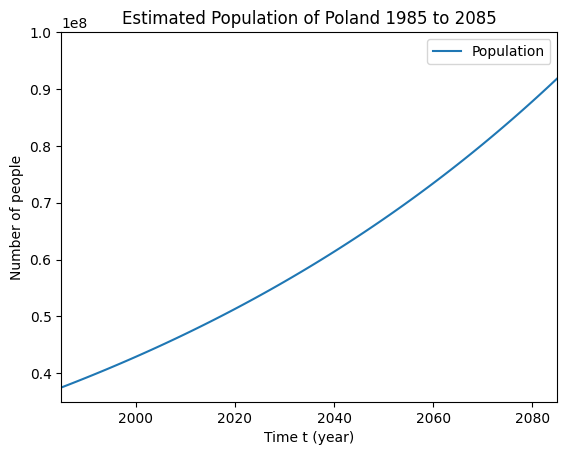

In [11]:
# initial conditions
tinitial = 1985
tfinal = 2085
pop_initial = 37500000
k = 0.009

# dynamically updating variables
pprime = k * pop_initial
t = tinitial
pop = pop_initial

# data stores for plotting
pop_data = [pop]
t_data = [t]

while (t < tfinal):
    # update population, growth rate, and increment time
    pop = pop + pprime
    pprime = k * pop
    t = t+1

    # store data
    pop_data.append(pop)
    t_data.append(t)

print("pop_final::: ", pop)

assert len(pop_data) == len(t_data)

fig = plt.figure()
ax = fig.add_subplot(111, axisbelow=True);
ax.plot(t_data, pop_data, label='Population');
ax.legend();
ax.set_title("Estimated Population of Poland 1985 to 2085");
ax.set_ylim(35000000, 100000000);
ax.set_xlim(tinitial, tfinal);
ax.set_xlabel('Time t (year)');
ax.set_ylabel('Number of people');
plt.show()

### Problem 2

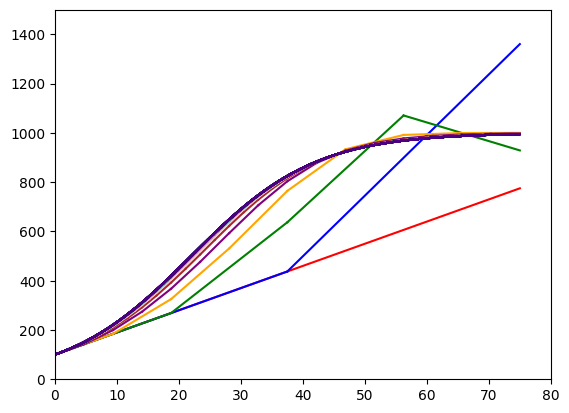

In [12]:
# SEQUENCE
fig = plt.figure()
ax = fig.add_subplot(111, axisbelow=True);

n_iters = 14
colors = ['red', 'blue', 'green', 'orange', 'purple',
          'brown', 'pink', 'gray', 'cyan', 'magenta',
          'yellow', 'lime', 'teal', 'indigo']

for j in range(1, n_iters+1):
    tinitial = 0
    tfinal = 75
    t = tinitial
    y = 100
    numsteps = 2**(j-1)
    deltat = (tfinal - tinitial) / numsteps
    for k in range(1, numsteps+1):
        yprime = 0.1 * y * (1 - y / 1000)
        deltay = yprime * deltat

        ax.plot((t,t+deltat), (y, y+deltay), color=colors[j-1])

        t = t + deltat
        y = y + deltay

ax.set_ylim(0, 1500);
ax.set_xlim(0, 80);
plt.show()

In [13]:
# adaptation of SEQUENCE to find y(37)

tinitial = 0
tfinal = 75
t = tinitial
y = 100
deltat = 0.01
data = list()

for k in np.arange(0, tfinal, deltat):
    yprime = 0.1 * y * (1 - y / 1000)
    deltay = yprime * deltat

    t = t + deltat
    y = y + deltay

    data.append((t, y))

y_at_37 = [y for t, y in data if math.isclose(t, 37)]
print(y_at_37)

[817.9505627166195]


By modifying SEQUENCE in the code above to have a deltat of 0.01, we obtain a value of y(37) = 817.95

### Problem 3

##### a)
As $t$ gets larger, the graph initially grows quite quickly from $t = 20$ to $t = 50$ then levels off with $y(t)$ hitting a horizontal asymptote around $\approx 1000$

##### b)
$y^{\prime} = 0.1y(1 - \frac{y}{1000})$

$y^{\prime} = 0.1(1000)(1 - \frac{1000}{1000})$

$y^{\prime} = 0$

If we start with $y(0) = 1000$ the net growth rate is 0 and the population stays at 1000.

##### c)
$y^{\prime} = 0.1(1500)(1 - \frac{1500}{1000})$

$y^{\prime} = -75$

If we start with $y(0) = 1500$ the net growth rate is negative, therefore the population will decline until it again levels off at 1000.

##### d)
$y^{\prime} = 0.1(0)(1 - \frac{0}{1000})$

$y^{\prime} = 0$

If we start with $y(0) = 0$ the net growth rate is again 0, so the population never grows and stays at 0.

##### e)
The physical interpretation of the carrying capacity in the context of a population of rabbits would be the ecological resources of the environment. The resources of the environment in which the rabbits live (food, water, space) sets the upper limit for how large the population can be.

### Problem 4

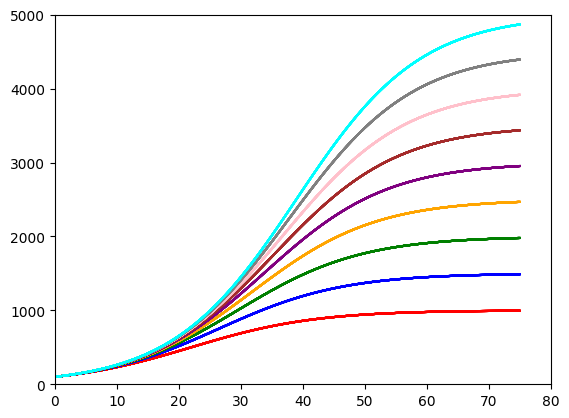

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, axisbelow=True);

colorp = 0
colors = ['red', 'blue', 'green', 'orange', 'purple',
          'brown', 'pink', 'gray', 'cyan', 'magenta',
          'yellow', 'lime', 'teal', 'indigo']

for j in range(1000, 5500, 500):
    tinitial = 0
    tfinal = 75
    t = tinitial
    y = 100
    numsteps = 2**12
    deltat = (tfinal - tinitial) / numsteps
    for k in range(1, numsteps+1):
        yprime = 0.1 * y * (1 - y / j)
        deltay = yprime * deltat

        ax.plot((t,t+deltat), (y, y+deltay), color=colors[colorp])

        t = t + deltat
        y = y + deltay
    
    colorp += 1

ax.set_ylim(0, 5000);
ax.set_xlim(0, 80);
plt.show()

As we can see in the graph above, as the carrying capacity is increased, the population growth follows the sigmoid function until it levels out at the carrying capacity of the system. Note that the net growth rate also grows faster for systems with a higher carrying capacity.

### Problem 5

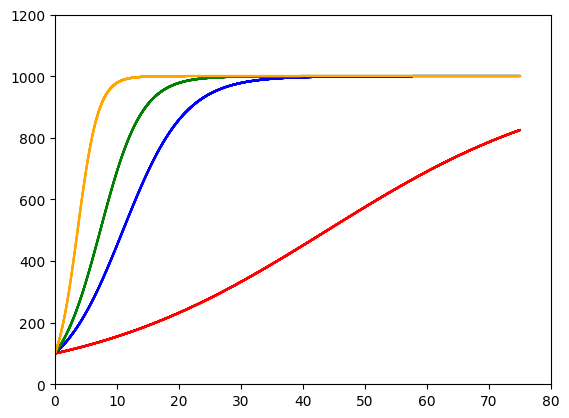

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, axisbelow=True);

colorp = 0
colors = ['red', 'blue', 'green', 'orange', 'purple',
          'brown', 'pink', 'gray', 'cyan', 'magenta',
          'yellow', 'lime', 'teal', 'indigo']
constants = [0.05, 0.2, 0.3, 0.6]
for j in range(0, len(constants)):
    tinitial = 0
    tfinal = 75
    t = tinitial
    y = 100
    numsteps = 2**12
    deltat = (tfinal - tinitial) / numsteps
    for k in range(1, numsteps+1):
        yprime = constants[j] * y * (1 - y / 1000)
        deltay = yprime * deltat

        ax.plot((t,t+deltat), (y, y+deltay), color=colors[colorp])

        t = t + deltat
        y = y + deltay
    
    colorp += 1

ax.set_ylim(0, 1200);
ax.set_xlim(0, 80);
plt.show()

The order of the constants in terms of line color goes from red (0.05), blue (0.2), green (0.3), orange (0.6). Therefore, we can see that increasing the constant value drastically increases the net growth rate and leads to the system leveling out at the carrying capacity much faster.

### Problem 6

In [16]:
tinitial = 0
tfinal = 75
t = tinitial
y = 100
deltat = 0.01
data = list()

for k in np.arange(0, tfinal, deltat):
    yprime = 0.1 * y * (1 - y / 1000)
    deltay = yprime * deltat

    t = t + deltat
    y = y + deltay

    data.append((t, y))

t_at_900 = [t for t, y in data if math.isclose(y, 900, abs_tol=0.05)]
print(t_at_900)

[43.93999999999983, 43.949999999999825]


The value of $y(t) = 900$ occurs at $t \approx 43.945$ 

### Problem 7

In [17]:
r = 0.2

while (r < 0.3):
    tinitial = 0
    tfinal = 20
    t = tinitial
    y = 100
    deltat = 0.1
    data = list()

    for k in np.arange(0, tfinal, deltat):
        yprime = r * y * (1 - y / 1000)
        deltay = yprime * deltat

        t = t + deltat
        y = y + deltay

        data.append(y)
    
    if (math.isclose(data[-1], 900, abs_tol=0.05)):
        print(data[-1])
        print(r)
        break

    r += 0.0001

899.9577275302047
0.21969999999999784


*Strategy adapted from Travis Williams Piazza post*

For this problem, I couldn't think how to solve the problem using just math, so I ended up doing what amounts to coded guess and check.

I started by looking at the graphs in problem 5 and could see that $y(20) = 900$ appeared to occur between $r = 0.2$ and $r = 0.3$. From here, I modified the modified SEQUENCE equations from earlier to investigate the values at $y(20)$ for rates between 0.2 and 0.3.

As we can see in the code above, we arrive at value of 900 (within a tolerance of +- 0.05) at $r \approx 0.2197$ 

## Section 2.3

### LENGTH CODE

In [18]:
def length(num_segs):

    for num in num_segs:
        xinitial = 0
        xfinal = 1
        numsteps = num
        deltax = (xfinal - xinitial) / numsteps
        total = 0

        for k in range(1, numsteps+1):
            xl = xinitial + (k-1) * deltax
            xr = xinitial + k * deltax
            yl = xl**2
            yr = xr**2
            segment = math.sqrt((xr - xl)**2 + (yr - yl)**2)
            total = total + segment
            # print(k, segment)

        print(numsteps, total)

segments = [2, 200, 2000, 20000, 200000, 2000000, 20000000]
length(segments)

2 1.4604048132409448
200 1.4789409941539637
2000 1.4789428389106982
20000 1.4789428573582588
200000 1.4789428575427506
2000000 1.4789428575446022
20000000 1.4789428575448835


### Problems 1-10

### Problem 1

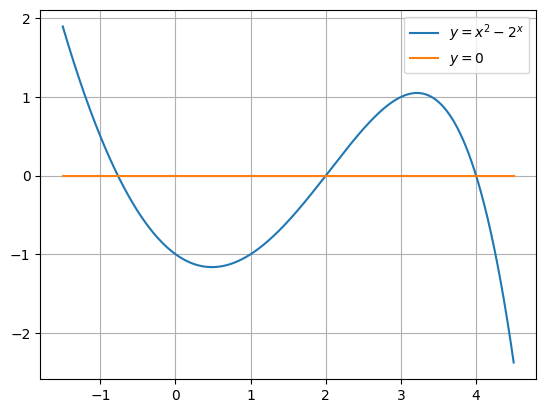

In [19]:
x = np.linspace(-1.5, 4.5, 1000)
y1 = x**2 - 2**x
y2 = x*0

plt.plot(x, y1, label=r'$y = x^2 - 2^x$')
plt.plot(x, y2, label=r'$y = 0$')
plt.grid(True)
plt.legend()
plt.show()

As we can see from this graph, the equation $y = x^2 - 2^x$ has 3 solutions (points where $x^2 - 2^x = 0$). By zooming in with progressively narrower bands in the linspace, we can hone in on the solutions to this graph to four decimal places.

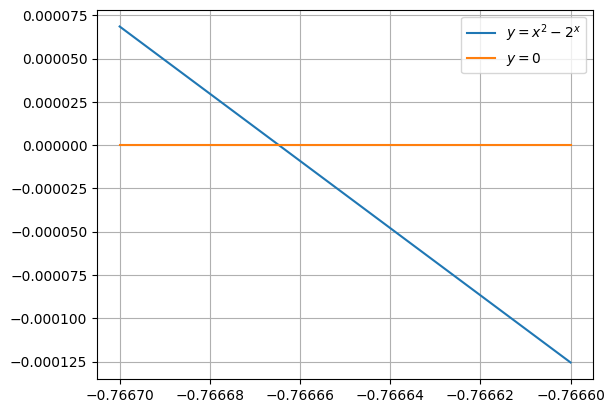

In [20]:
# solution 1: x = -0.7666
x = np.linspace(-0.7667, -0.7666, 1000)
y1 = x**2 - 2**x
y2 = x*0

plt.plot(x, y1, label=r'$y = x^2 - 2^x$')
plt.plot(x, y2, label=r'$y = 0$')
plt.grid(True)
plt.legend()
plt.show()

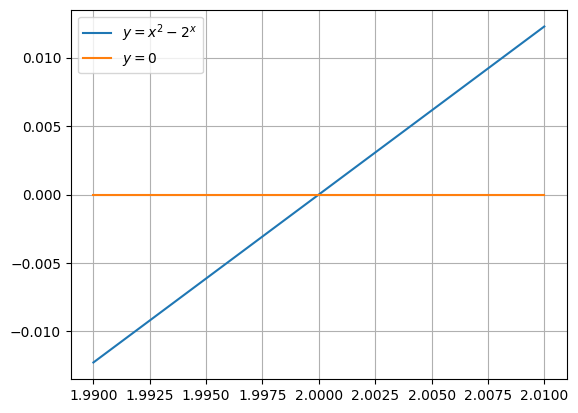

In [21]:
# solution 2: x = 2.000
x = np.linspace(1.99, 2.01, 1000)
y1 = x**2 - 2**x
y2 = x*0

plt.plot(x, y1, label=r'$y = x^2 - 2^x$')
plt.plot(x, y2, label=r'$y = 0$')
plt.grid(True)
plt.legend()
plt.show()

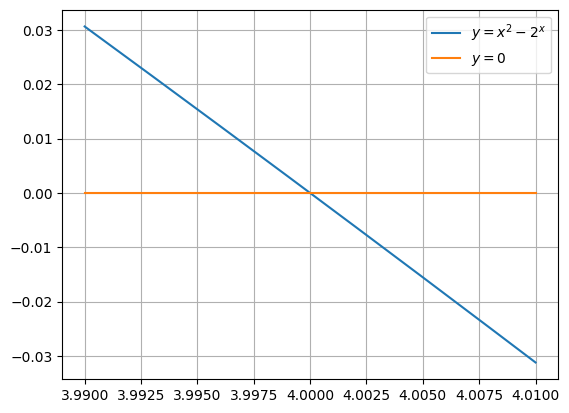

In [22]:
# soltuion 3: x = 4.000
x = np.linspace(3.99, 4.01, 1000)
y1 = x**2 - 2**x
y2 = x*0

plt.plot(x, y1, label=r'$y = x^2 - 2^x$')
plt.plot(x, y2, label=r'$y = 0$')
plt.grid(True)
plt.legend()
plt.show()

### Problem 2

In running the length code at the top of this section, I can confirm the the program runs correctly and provides the same values as those presented in the book.

1 0.5590169943749475

2 0.9013878188659973

2 1.4604048132409448

### Problem 3

$DEF fnf (x) = x^2$ is the function for $f(x) = x^2$ and this function is called within the program twice:

yl = fnf(xl)

yr = fnf(xr)

which sets the left and right y point for the corresponding left and right x point to be measured in the subsequent call using the Euclidean distance formula.

The number of segments to break the interval xinitial - xfinal into is set by the $numberofstep$ variable.

### Problem 4

See the answer above.

### Problem 5

The kth segment is measured in the kth iteration of the for loop. The length of the base of the triangle is $xr - xl$ and the altitude is $yr - yl$.

### Problem 6

With 20 segments, the estimated length of the parabola is $ \approx 1.4788$

### Problem 7

See $length()$ program above. The output corresponds exactly to the output provided in the book:

2 1.4604048132409448

200 1.4789409941539637

2000 1.4789428389106982

20000 1.4789428573582588

200000 1.4789428575427506

2000000 1.4789428575446022

20000000 1.4789428575448835


### Problem 8

Correct to 8: 1.47894285

Correct to 12: 1.478942857544

### Problem 9

In [23]:
def length2():

    xinitial = 0
    xfinal = 1
    total = 0

    while (not math.isclose(total, 10, abs_tol=0.05)):
        total = 0
        numsteps = 200000
        deltax = (xfinal - xinitial) / numsteps

        for k in range(1, numsteps+1):
            xl = xinitial + (k-1) * deltax
            xr = xinitial + k * deltax
            yl = xl**2
            yr = xr**2
            segment = math.sqrt((xr - xl)**2 + (yr - yl)**2)
            total = total + segment

        xfinal = xfinal + 0.01

    print(xfinal, total)

length2()

3.0499999999999785 9.991977677830729


When starting at the origin and moving to the in the positive direction along the parabola, you are at $x \approx 3.05$ when you have gone a total distance (as measured along the curve) of 10.

### Problem 10

In [24]:
def length3():
    xinitial = 0
    xfinal = 1
    numsteps = 2000000
    deltax = (xfinal - xinitial) / numsteps
    total = 0

    for k in range(1, numsteps+1):
        xl = xinitial + (k-1) * deltax
        xr = xinitial + k * deltax
        yl = xl**3
        yr = xr**3
        segment = math.sqrt((xr - xl)**2 + (yr - yl)**2)
        total = total + segment

    print(numsteps, total)

length3()

2000000 1.5478656546836085


The length of the curve of $x^3$ from $0 \leq x \leq 1$ is:

$\approx 1.54786565$ correct to 8 decimal places.

### How bad is your epidemic?

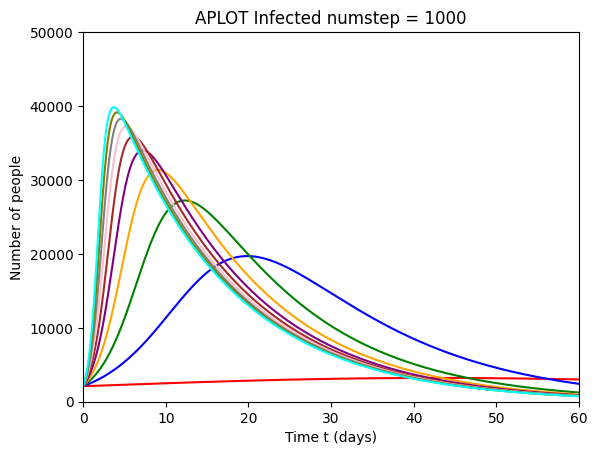

In [25]:
#APLOT

colors = ['red', 'blue', 'green', 'orange',
          'purple', 'brown', 'pink', 'gray',
          'olive', 'cyan']
j = 0

fig = plt.figure();
ax = fig.add_subplot(111, axisbelow=True);

for a in np.arange(0.000002, 0.00004,  0.000004):
    t_data = list()
    S_data = list()
    I_data = list()
    R_data = list()

    tinitial = 0
    tfinal = 60

    t = tinitial
    S = 45400
    I = 2100
    R = 2500

    a = a
    b = (1/14)

    numsteps = 1000

    deltat = (tfinal - tinitial)/numsteps

    for i in range(0, numsteps+1):
        Sprime = -a * S * I
        Iprime = (a * S * I) - (I/14)
        Rprime = I * b

        deltaS = Sprime * deltat
        deltaI = Iprime * deltat
        deltaR = Rprime * deltat

        t_data.append(t)
        S_data.append(S)
        I_data.append(I)
        R_data.append(R)

        t = t + deltat
        S = S + deltaS
        I = I + deltaI
        R = R + deltaR

    ax.plot(t_data, I_data, color=colors[j]);
    j += 1


ax.set_title(f"APLOT Infected numstep = {numsteps}");
ax.set_ylim(0, 50000);
ax.set_xlim(0, tfinal);
ax.set_xlabel('Time t (days)');
ax.set_ylabel('Number of people');
plt.show()

##### 3.
As $a$ gets larger, the number of infected grows faster and faster causing the illness to peak much sooner. Blue has the second smallest $a$ value and it peaks around day 20, whereas cyan has the highest value and it peak arond day 3.


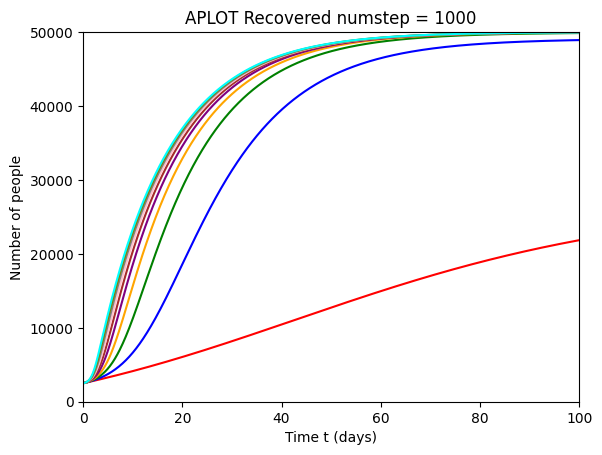

In [26]:
#APLOT

colors = ['red', 'blue', 'green', 'orange',
          'purple', 'brown', 'pink', 'gray',
          'olive', 'cyan']
j = 0

fig = plt.figure();
ax = fig.add_subplot(111, axisbelow=True);

for a in np.arange(0.000002, 0.00004,  0.000004):
    t_data = list()
    S_data = list()
    I_data = list()
    R_data = list()

    tinitial = 0
    tfinal = 100

    t = tinitial
    S = 45400
    I = 2100
    R = 2500

    a = a
    b = (1/14)

    numsteps = 1000

    deltat = (tfinal - tinitial)/numsteps

    for i in range(0, numsteps+1):
        Sprime = -a * S * I
        Iprime = (a * S * I) - (I/14)
        Rprime = I * b

        deltaS = Sprime * deltat
        deltaI = Iprime * deltat
        deltaR = Rprime * deltat

        t_data.append(t)
        S_data.append(S)
        I_data.append(I)
        R_data.append(R)

        t = t + deltat
        S = S + deltaS
        I = I + deltaI
        R = R + deltaR

    ax.plot(t_data, R_data, color=colors[j]);
    j += 1


ax.set_title(f"APLOT Recovered numstep = {numsteps}");
ax.set_ylim(0, 50000);
ax.set_xlim(0, tfinal);
ax.set_xlabel('Time t (days)');
ax.set_ylabel('Number of people');
plt.show()

##### 4.


With larger values of $a$ the total number of people infected by the end of the epidemic is larger depending on the time cutoff you make. In the graph above we see the at 40 days, more people would be infected for larger $a$ values. However, if we expand the time horizon, eventually all susceptibles will be infected.

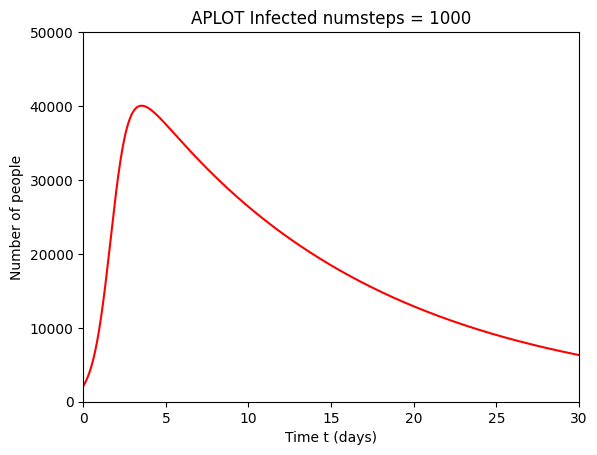

In [27]:
#LPLOT

colors = ['red', 'blue', 'green', 'orange',
          'purple', 'brown', 'pink', 'gray',
          'olive', 'cyan']
j = 0

fig = plt.figure();
ax = fig.add_subplot(111, axisbelow=True);

for L in range(14, 15):
    t_data = list()
    S_data = list()
    I_data = list()
    R_data = list()

    tinitial = 0
    tfinal = 30

    t = tinitial
    S = 45400
    I = 2100
    R = 2500

    a = 0.00004
    b = (1/L)

    numsteps = 1000

    deltat = (tfinal - tinitial)/numsteps

    for i in range(0, numsteps+1):
        Sprime = -a * S * I
        Iprime = (a * S * I) - (I/L)
        Rprime = I * b

        deltaS = Sprime * deltat
        deltaI = Iprime * deltat
        deltaR = Rprime * deltat

        t_data.append(t)
        S_data.append(S)
        I_data.append(I)
        R_data.append(R)

        t = t + deltat
        S = S + deltaS
        I = I + deltaI
        R = R + deltaR

    ax.plot(t_data, I_data, color=colors[j]);
    j += 1


ax.set_title(f"APLOT Infected numsteps = {numsteps}");
ax.set_ylim(0, 50000);
ax.set_xlim(0, tfinal);
ax.set_xlabel('Time t (days)');
ax.set_ylabel('Number of people');
plt.show()

##### 6.

Higher values of $L$ cause the illness to peak sooner with more people infected. This makes sense, since an illness that takes longer to recover from would result in more susceptibles coming into contact with people who are ill.

##### 7.

The big jump occurs from day 1 to day 2. When the illness only lasts for 1 day, it never gains traction on fizzles out—whereas with L = 2 we see the classic epidemic bump emerge.

##### 8.

Again, with higher values of $L$ we see more total people infected; however there is interestingly some cross over in the lines between days 5 and 10 which is interesting.

##### 10.

With an L value of 14 (long illness) and an A value of 0.00004 (high transmission rate), we get an illness that peaks soon with many infected.

##### 11.

Higher A and L cause a higher threshold value below which the illness needs to cross in order to die out—which is why high peak and earlier dies out faster.

##### 12.

We could just store Iprime data in an array and push to it when the time slices equal 1 days then plot this data. We could similarly store the total infect since day 0 in a global array that we continually update during our iterations.